##Final Data Analysis##

Below is the final data analysis to show how the FEA and Testing results aligned, differed, and handled variable sensitivity.

###Setup###

Setup code to import modules and csv data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from google.colab import files
import io

In [13]:
B_MASS = 0.0577 # kg

def kinetic_e(velo, mass):
  """
  Takes an object's instantaneous velocity and mass and returns a kinetic energy

  :param velo: Velocity of the object (m/s)
  :param mass: Mass of the object (kg)
  :return: Kinetic energy in joules
  """
  return (0.5)*mass*(velo**2)

def potential_e(height, mass):
  """
  Takes an object's height and mass and returns a potential energy

  :param height: Height of the object (m)
  :param mass: Mass of the object (kg)
  :return: Potential energy in joules
  """
  return mass * 9.81 * height

def final_height(drop, diff):
  """
  Takes the height difference and the original height and returns the final
  height of the object.

  :param drop: drop height (m)
  :param diff: height difference (m)
  :return: final height of the object (m)
  """
  return drop - diff

plt.rcParams['figure.figsize'] = (15, 10) 
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [14]:
ABAQUS = pd.read_csv('https://raw.githubusercontent.com/dtb00789/csv_data/main/ABAQUS.csv')
ABAQUS = ABAQUS.set_index('Simulation')

ABAQUS


,Percent KE Loss
Simulation,
syn_40_50,4.271001
syn_40_100,7.663183
syn_40_150,7.981145
syn_50_50,4.194459
syn_50_100,7.655835
syn_50_150,7.927741
syn_60_50,4.214920
syn_60_100,7.647752
syn_60_150,7.871824


In [15]:
old_testing = pd.read_csv('https://raw.githubusercontent.com/dtb00789/csv_data/main/Testing_perc.csv')
old_testing = old_testing.set_index('Test')
old_testing

,% PE Loss
Test,
syn_40_50,27.400000
syn_40_100,27.766667
syn_40_150,28.055556
syn_50_50,29.633333
syn_50_100,30.250000
syn_50_150,30.500000
syn_60_50,30.000000
syn_60_100,30.983333
syn_60_150,30.833333


In [16]:
dat = []
for some in old_testing:
  for val in old_testing[some]:
    new = pd.Series(val, index = [some])
    dat.append(new)

testing = pd.DataFrame(dat, index = ['Syn Gut 40 lb. 50 cm', 'Syn Gut 40 lb. 100 cm', 'Syn Gut 40 lb. 150 cm',
     'Syn Gut 50 lb. 50 cm', 'Syn Gut 50 lb. 100 cm', 'Syn Gut 50 lb. 150 cm',
     'Syn Gut 60 lb. 50 cm', 'Syn Gut 60 lb. 100 cm', 'Syn Gut 60 lb. 150 cm',
     'Poly 40 lb. 50 cm', 'Poly 40 lb. 100 cm', 'Poly 40 lb. 150 cm',
     'Poly 50 lb. 50 cm', 'Poly 50 lb. 100 cm', 'Poly 50 lb. 150 cm',
     'Poly 60 lb. 50 cm', 'Poly 60 lb. 100 cm', 'Poly 60 lb. 150 cm',
     'Frying Pan 50 cm', 'Frying Pan 100 cm', 'Frying Pan 150 cm'])
testing

,% PE Loss
Syn Gut 40 lb. 50 cm,27.400000
Syn Gut 40 lb. 100 cm,27.766667
Syn Gut 40 lb. 150 cm,28.055556
Syn Gut 50 lb. 50 cm,29.633333
Syn Gut 50 lb. 100 cm,30.250000
Syn Gut 50 lb. 150 cm,30.500000
Syn Gut 60 lb. 50 cm,30.000000
Syn Gut 60 lb. 100 cm,30.983333
Syn Gut 60 lb. 150 cm,30.833333
Poly 40 lb. 50 cm,24.933333


In [17]:
stdev = pd.read_csv('https://raw.githubusercontent.com/dtb00789/csv_data/main/stdev.csv')
stdev = stdev.set_index('list')

stdev


,stdev
list,
syn_40_50,0.715542
syn_40_100,0.427395
syn_40_150,0.624559
syn_50_50,0.983192
syn_50_100,0.779102
syn_50_150,0.721418
syn_60_50,0.619677
syn_60_100,1.090718
syn_60_150,1.194618


In [18]:
stdev1 = stdev.transpose()
stdev1

list,syn_40_50,syn_40_100,syn_40_150,syn_50_50,syn_50_100,syn_50_150,syn_60_50,syn_60_100,syn_60_150,poly_40_50,poly_40_100,poly_40_150,poly_50_50,poly_50_100,poly_50_150,poly_60_50,poly_60_100,poly_60_150,fry_50,fry_100,fry_150
stdev,0.715542,0.427395,0.624559,0.983192,0.779102,0.721418,0.619677,1.090718,1.194618,0.722957,0.672309,0.619319,1.091177,0.513809,0.794145,0.794145,0.918695,0.68378,1.184342,1.978552,4.205552


###Initial Figures###

In [19]:
index_1 = ['Syn Gut 40 lb.', 'Syn Gut 50 lb.', 'Syn Gut 60 lb.', 'Poly 40 lb.',
          'Poly 50 lb.', 'Poly 60 lb.', 'Frying Pan']
pot_e_loss = []
stdev_l = []
dat_l = []
dat_std = []
for i in range(len(old_testing)):
  dat = old_testing['% PE Loss'][i]
  dat2 = stdev['stdev'][i]
  dat_l.append(dat)
  dat_std.append(dat2)
  if len(dat_l) == 3:
    pot_e_loss.append(pd.Series(dat_l, index = ['50 cm', '100 cm', '150 cm']))
    stdev_l.append(pd.Series(dat_std, index = ['50 cm', '100 cm', '150 cm']))
    dat_l = []
    dat_std = []

prim_fig = pd.DataFrame(pot_e_loss, index = index_1)
prim_fig



,50 cm,100 cm,150 cm
Syn Gut 40 lb.,27.400000,27.766667,28.055556
Syn Gut 50 lb.,29.633333,30.250000,30.500000
Syn Gut 60 lb.,30.000000,30.983333,30.833333
Poly 40 lb.,24.933333,25.800000,27.966667
Poly 50 lb.,28.633333,28.700000,29.900000
Poly 60 lb.,29.633333,29.600000,29.600000
Frying Pan,46.066667,48.233333,46.411111


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


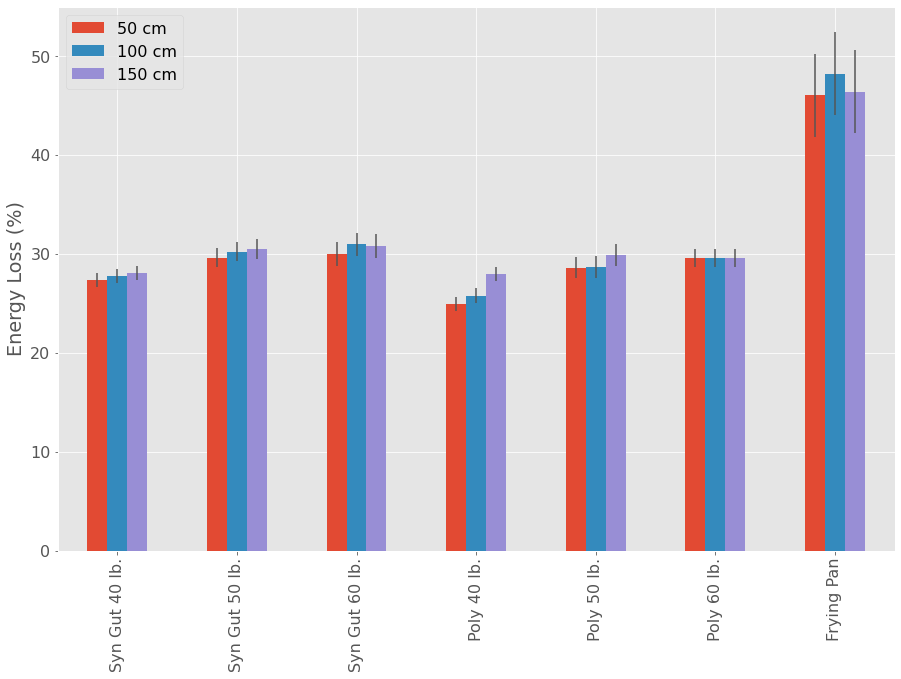

In [20]:
fig1 = prim_fig.plot(kind = 'bar', yerr = [0.715542, 0.983192, 1.19, 0.722957, 1.09, 0.918695, 4.2])
fig1.set_ylabel('Energy Loss (%)')
fig1.set_ylim(0, 55)
fig1

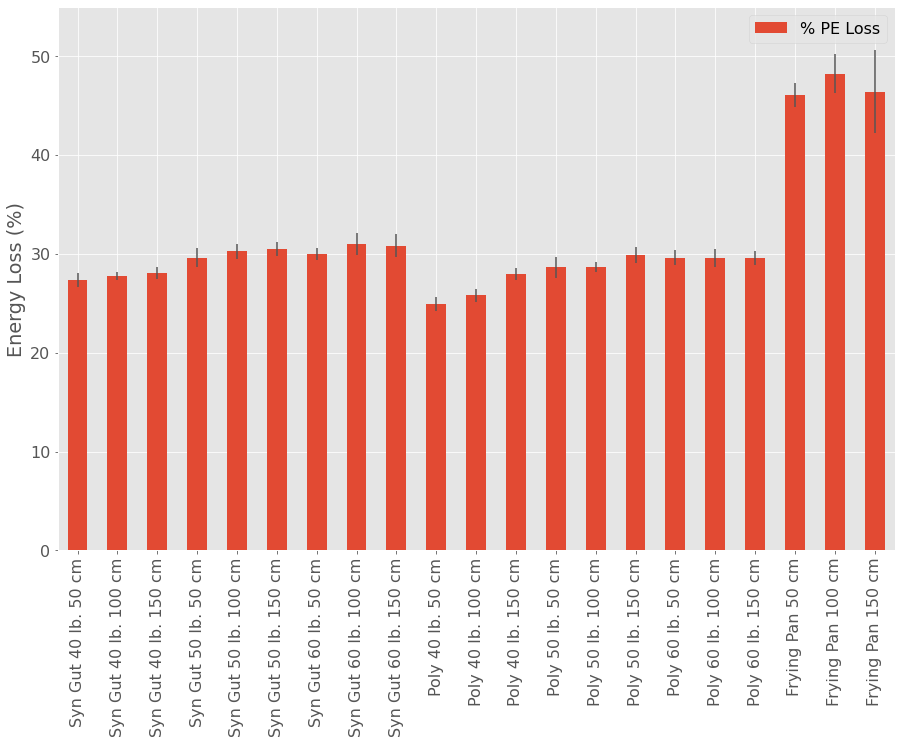

In [21]:
fig2 = testing.plot(kind = 'bar', yerr = [0.715542,	0.427395,	0.624559,
                        0.983192,	0.779102,	0.721418,	0.619677,	1.090718,	1.194618,
                        0.722957,	0.672309,	0.619319,	1.091177,	0.513809,	0.794145,
                        	0.794145,	0.918695,	0.68378,	1.184342,	1.978552,	4.205552])
fig2.set_ylabel('Energy Loss (%)')
fig2.set_ylim(0, 55)
fig2

In [22]:
no_fry = prim_fig.loc['Syn Gut 40 lb.':'Poly 60 lb.']
no_fry

,50 cm,100 cm,150 cm
Syn Gut 40 lb.,27.400000,27.766667,28.055556
Syn Gut 50 lb.,29.633333,30.250000,30.500000
Syn Gut 60 lb.,30.000000,30.983333,30.833333
Poly 40 lb.,24.933333,25.800000,27.966667
Poly 50 lb.,28.633333,28.700000,29.900000
Poly 60 lb.,29.633333,29.600000,29.600000


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


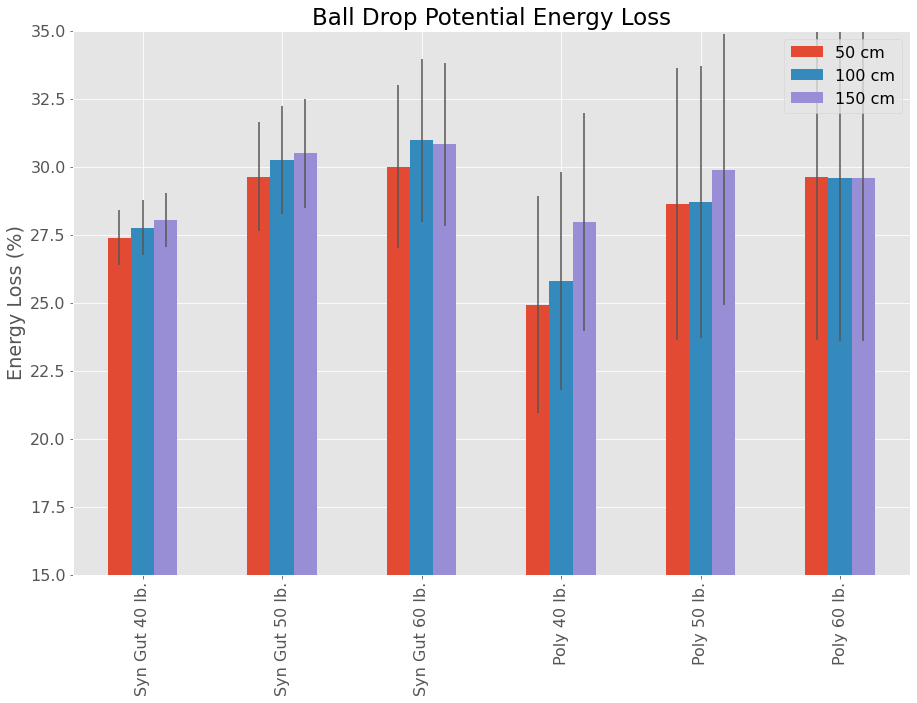

In [23]:
fig2 = no_fry.plot(kind = 'bar', yerr = [1, 2, 3, 4, 5, 6])
fig2.set_title('Ball Drop Potential Energy Loss')
fig2.set_ylabel('Energy Loss (%)')
fig2.set_ylim(15, 35)
fig2

###FEA vs. Testing###

In [24]:
FEA_testing = []

for i in range(18):
  FEA = ABAQUS['Percent KE Loss'][i]
  test = testing['% PE Loss'][i]
  FEA_testing.append(pd.Series((test, FEA), index = ['Test % Loss', 'FEA % Loss']))

comp_ind = ['Syn Gut 40 lb. 50 cm', 'Syn Gut 40 lb. 100 cm', 'Syn Gut 40 lb. 150 cm',
            'Syn Gut 50 lb. 50 cm', 'Syn Gut 50 lb. 100 cm', 'Syn Gut 50 lb. 150 cm',
            'Syn Gut 60 lb. 50 cm', 'Syn Gut 60 lb. 100 cm', 'Syn Gut 60 lb. 150 cm',
            'Poly 40 lb. 50 cm', 'Poly 40 lb. 100 cm', 'Poly 40 lb. 150 cm',
            'Poly 50 lb. 50 cm', 'Poly 50 lb. 100 cm', 'Poly 50 lb. 150 cm',
            'Poly 60 lb. 50 cm', 'Poly 60 lb. 100 cm', 'Poly 60 lb. 150 cm']
FEAvTesting = pd.DataFrame(FEA_testing, comp_ind)
FEAvTesting

,Test % Loss,FEA % Loss
Syn Gut 40 lb. 50 cm,27.400000,4.271001
Syn Gut 40 lb. 100 cm,27.766667,7.663183
Syn Gut 40 lb. 150 cm,28.055556,7.981145
Syn Gut 50 lb. 50 cm,29.633333,4.194459
Syn Gut 50 lb. 100 cm,30.250000,7.655835
Syn Gut 50 lb. 150 cm,30.500000,7.927741
Syn Gut 60 lb. 50 cm,30.000000,4.214920
Syn Gut 60 lb. 100 cm,30.983333,7.647752
Syn Gut 60 lb. 150 cm,30.833333,7.871824
Poly 40 lb. 50 cm,24.933333,4.606083


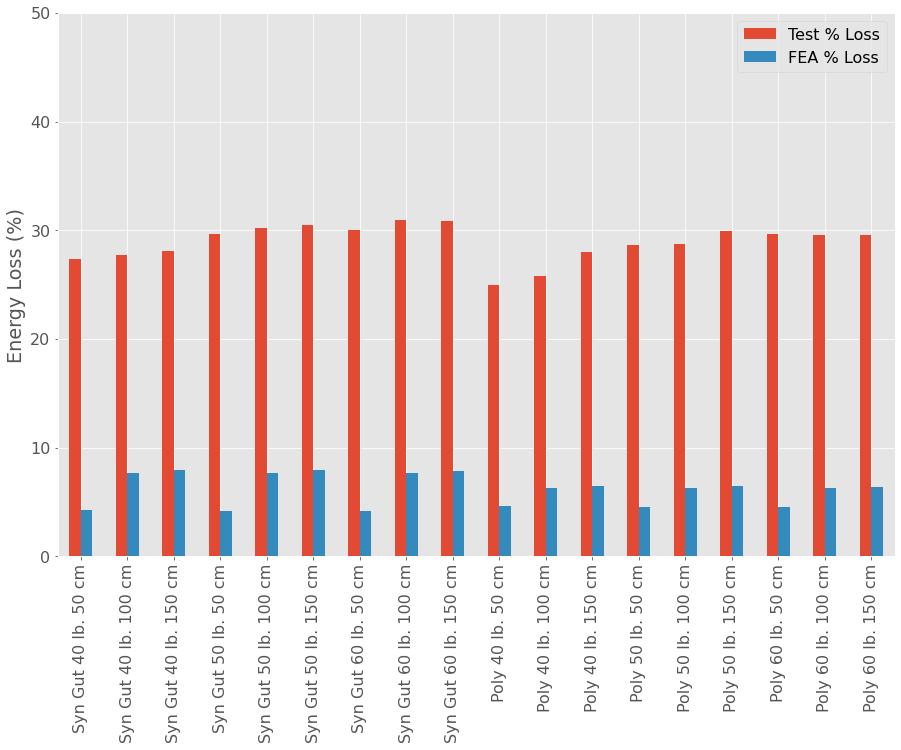

In [25]:
fig3 = FEAvTesting.plot(kind = 'bar')
fig3.set_ylabel('Energy Loss (%)')
fig3.set_ylim(0, 50)
fig3

###Change in % Loss###

In [26]:
ABAQUS

,Percent KE Loss
Simulation,
syn_40_50,4.271001
syn_40_100,7.663183
syn_40_150,7.981145
syn_50_50,4.194459
syn_50_100,7.655835
syn_50_150,7.927741
syn_60_50,4.214920
syn_60_100,7.647752
syn_60_150,7.871824


In [27]:
testing

,% PE Loss
Syn Gut 40 lb. 50 cm,27.400000
Syn Gut 40 lb. 100 cm,27.766667
Syn Gut 40 lb. 150 cm,28.055556
Syn Gut 50 lb. 50 cm,29.633333
Syn Gut 50 lb. 100 cm,30.250000
Syn Gut 50 lb. 150 cm,30.500000
Syn Gut 60 lb. 50 cm,30.000000
Syn Gut 60 lb. 100 cm,30.983333
Syn Gut 60 lb. 150 cm,30.833333
Poly 40 lb. 50 cm,24.933333


In [28]:
del_perc = []
data = []
for i in range(len(testing)):
  if (i + 1) % 3 != 0:
    dat = testing['% PE Loss'][i + 1] - testing['% PE Loss'][i]
    data.append(dat)
    if len(data) == 2:
     del_perc.append(pd.Series(data, index = ['50 to 100 cm.', '100 to 150 cm.']))
     data = []

perc_change = pd.DataFrame(del_perc, index = index_1)
perc_change

,50 to 100 cm.,100 to 150 cm.
Syn Gut 40 lb.,0.366667,0.288889
Syn Gut 50 lb.,0.616667,0.250000
Syn Gut 60 lb.,0.983333,-0.150000
Poly 40 lb.,0.866667,2.166667
Poly 50 lb.,0.066667,1.200000
Poly 60 lb.,-0.033333,0.000000
Frying Pan,2.166667,-1.822222


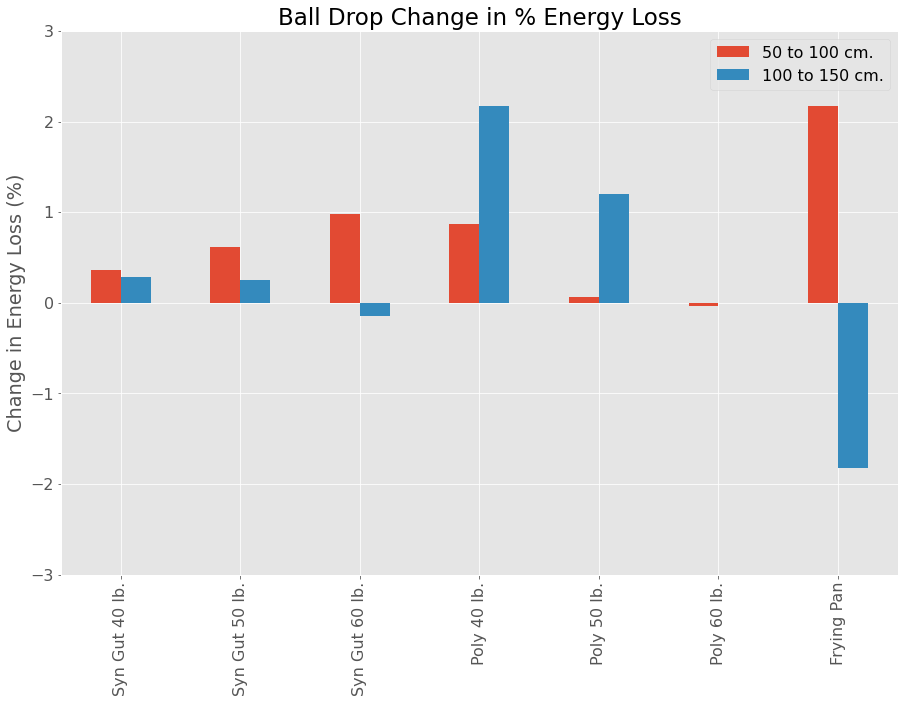

In [29]:
fig4 = perc_change.plot(kind = 'bar')
fig4.set_title('Ball Drop Change in % Energy Loss')
fig4.set_ylabel('Change in Energy Loss (%)')
fig4.set_ylim(-3, 3)
fig4

In [30]:
index2 = ['Syn Gut 40 lb.', 'Syn Gut 50 lb.', 'Syn Gut 60 lb.', 'Poly 40 lb.',
          'Poly 50 lb.', 'Poly 60 lb.', 'Multi 40 lb.',
          'Multi 50 lb.', 'Multi 60 lb.']
del_perc_A = []
data = []
for i in range(len(ABAQUS)):
  if (i + 1) % 3 != 0:
    dat = ABAQUS['Percent KE Loss'][i + 1] - ABAQUS['Percent KE Loss'][i]
    data.append(dat)
    if len(data) == 2:
     del_perc_A.append(pd.Series(data, index = ['50 to 100 cm.', '100 to 150 cm.']))
     data = []

perc_change_FEA = pd.DataFrame(del_perc_A, index = index2)
perc_change_FEA

,50 to 100 cm.,100 to 150 cm.
Syn Gut 40 lb.,3.392183,0.317962
Syn Gut 50 lb.,3.461377,0.271905
Syn Gut 60 lb.,3.432832,0.224072
Poly 40 lb.,1.725696,0.177965
Poly 50 lb.,1.729154,0.168787
Poly 60 lb.,1.719378,0.159182
Multi 40 lb.,3.958198,1.715708
Multi 50 lb.,3.908427,1.694691
Multi 60 lb.,3.839521,1.673644


In [31]:
comp_perc = perc_change_FEA.loc['Syn Gut 40 lb.':'Poly 60 lb.']
comp_perc

,50 to 100 cm.,100 to 150 cm.
Syn Gut 40 lb.,3.392183,0.317962
Syn Gut 50 lb.,3.461377,0.271905
Syn Gut 60 lb.,3.432832,0.224072
Poly 40 lb.,1.725696,0.177965
Poly 50 lb.,1.729154,0.168787
Poly 60 lb.,1.719378,0.159182


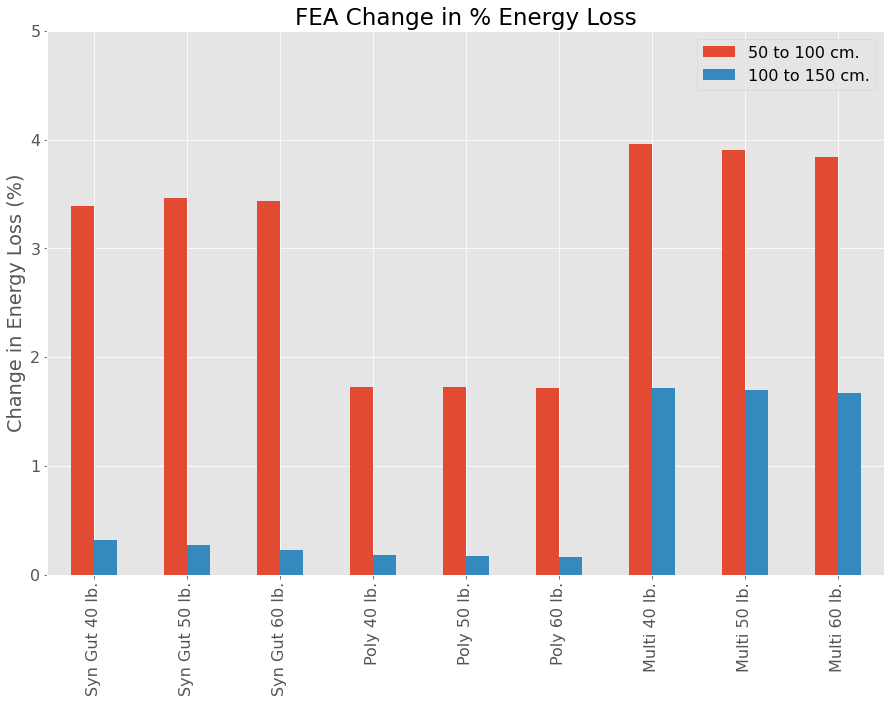

In [32]:
fig5 = perc_change_FEA.plot(kind = 'bar')
fig5.set_title('FEA Change in % Energy Loss')
fig5.set_ylabel('Change in Energy Loss (%)')
fig5.set_ylim(0, 5)
fig5

In [33]:
perc_change_FEA

,50 to 100 cm.,100 to 150 cm.
Syn Gut 40 lb.,3.392183,0.317962
Syn Gut 50 lb.,3.461377,0.271905
Syn Gut 60 lb.,3.432832,0.224072
Poly 40 lb.,1.725696,0.177965
Poly 50 lb.,1.729154,0.168787
Poly 60 lb.,1.719378,0.159182
Multi 40 lb.,3.958198,1.715708
Multi 50 lb.,3.908427,1.694691
Multi 60 lb.,3.839521,1.673644


In [34]:
comp_perc_ch = perc_change.loc['Syn Gut 40 lb.':'Poly 60 lb.']
comp_perc_ch

,50 to 100 cm.,100 to 150 cm.
Syn Gut 40 lb.,0.366667,0.288889
Syn Gut 50 lb.,0.616667,0.250000
Syn Gut 60 lb.,0.983333,-0.150000
Poly 40 lb.,0.866667,2.166667
Poly 50 lb.,0.066667,1.200000
Poly 60 lb.,-0.033333,0.000000


In [35]:
comp_data = []
new_data = []
for i in range(len(comp_perc)):
  dat1 = comp_perc_ch['50 to 100 cm.'][i]
  dat2 = comp_perc['50 to 100 cm.'][i]
  dat3 = comp_perc_ch['100 to 150 cm.'][i]
  dat4 = comp_perc['100 to 150 cm.'][i]
  new_data.append(dat1)
  new_data.append(dat2)
  new_data.append(dat3)
  new_data.append(dat4)
  comp_data.append(pd.Series(new_data, index = ['Testing 50 to 100 cm', 
                                                'FEA 50 to 100 cm', 'Testing 100 to 150 cm', 'FEA 100 to 150 cm']))
  new_data = []

comp_data = pd.DataFrame(comp_data, index = comp_perc_ch.index)
comp_data

,Testing 50 to 100 cm,FEA 50 to 100 cm,Testing 100 to 150 cm,FEA 100 to 150 cm
Syn Gut 40 lb.,0.366667,3.392183,0.288889,0.317962
Syn Gut 50 lb.,0.616667,3.461377,0.250000,0.271905
Syn Gut 60 lb.,0.983333,3.432832,-0.150000,0.224072
Poly 40 lb.,0.866667,1.725696,2.166667,0.177965
Poly 50 lb.,0.066667,1.729154,1.200000,0.168787
Poly 60 lb.,-0.033333,1.719378,0.000000,0.159182


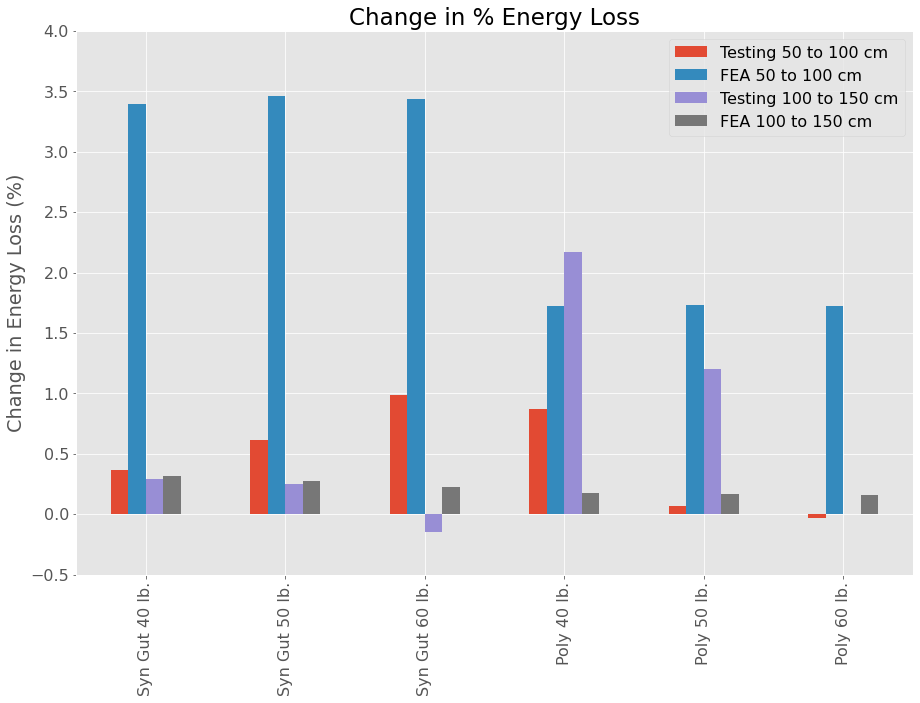

In [36]:
fig6 = comp_data.plot(kind = 'bar')
fig6.set_title('Change in % Energy Loss')
fig6.set_ylabel('Change in Energy Loss (%)')
fig6.set_ylim(-.5, 4)
fig6